### Exercício adaptado do livro [Data Science for Marketing Analytics](https://github.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition) 

## Exercício 3: Segmentação de Clientes de Shopping - Entendendo os dados


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
data0 = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter03/Datasets/Mall_Customers.csv")
data0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Renomeando Colunas

In [ ]:
data0.rename({'Annual Income (k$)':'Income', \
              'Spending Score (1-100)':'Spend_score'}, axis=1, \
             inplace=True)
data0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Analisando a Distribuição dos Dados
data0.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Standardization (padronização) dos dados

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
cols_to_scale = ['Age', 'Income', 'Spend_score']

In [ ]:
data_scaled = data0.copy()

In [ ]:
data_scaled[cols_to_scale] = scaler.fit_transform(data0[cols_to_scale])

In [ ]:
data_scaled[cols_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


### Calculando a distancia entre entidades (clientes)

In [ ]:
sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

In [ ]:
# Como se fosse calcular a hipotenusa de um triangulo retângulo
np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

1.6305

In [ ]:
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


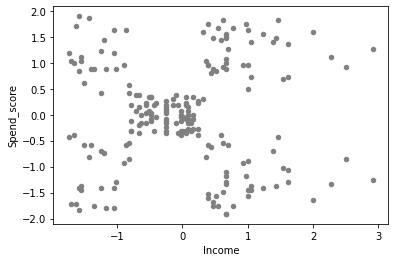

In [ ]:
data_scaled.plot.scatter(x='Income', y='Spend_score', color='gray')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
# Configurar os parametros do modelo instanciando a classe KMeans
# Nenhuma análise de dados é realizada nesta etapa
model = KMeans(n_clusters=5, random_state=42)
# Porque n_clusters=5 ?

In [ ]:
# Criando o modelo em si, ou seja, fazendo o fit de um modelo com os dados presentes no dataset de clientes
model.fit(data_scaled[cluster_cols])
# Classificar/Atribuir um cluster (predict) aos registros presentes no dataset
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

In [ ]:
data_scaled.head(3)

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,2
1,2,Male,-1.281035,-1.738999,1.195704,3
2,3,Female,-1.352802,-1.700830,-1.715913,2


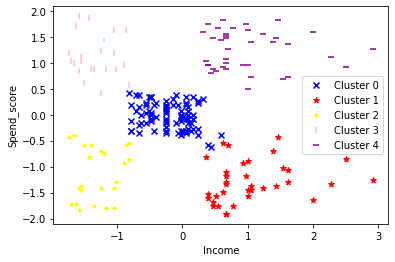

In [ ]:
# Visualizar os clusters graficamente

markers = ['x', '*', '.','|','_']
color = ['blue', 'red', 'yellow', 'pink', 'purple', 'gray', 'magenta']

for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                color = color[clust],\
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

### Segmentação de Clientes para Campanha de Empréstimo Bancário

A tarefa é criar segmentos de clientes para maximizar a eficácia da campanha de empréstimo.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
bank0 = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter03/Datasets/Bank_Personal_Loan_Modelling-1.csv")
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


*   **Experience**: A experiência de trabalho do cliente em anos 
*   **Renda**: A renda anual estimada do cliente (em milhares de dólares)
*   **CCAvg**: O gasto médio com cartões de crédito por mês (em milhares de dólares)
*   **Mortgage**: O valor da hipoteca da casa do cliente (se houver) 
*   **Idade**: A idade (em anos) do cliente
*   **Personal Loan**: Se o cliente aderiou ou não à campanha de empréstimo anterior

In [ ]:
bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Não usar a coluna **Personal Loan** como propriedade da clusterização. A análise não abrangeria clientes que não participaram da campanha anterior (Ex.: clientes novos). Use esta coluna para quantificar a chance do cluster se engajar na campanha.

In [ ]:
scaler = StandardScaler()
bank0[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform(bank0[['Income', 'CCAvg']])
bank0[['Income_scaled', 'CCAvg_scaled']].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


In [ ]:
# Por que N=3 ? random_state=42?
model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Income_scaled', 'CCAvg_scaled']
# Fit do modelo aos dados
model.fit(bank0[cluster_cols])

# Predição
bank0['Cluster'] = model.predict(bank0[cluster_cols])

In [ ]:
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Income_scaled,CCAvg_scaled,Cluster
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,-0.538229,-0.193385,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,-0.864109,-0.250611,1
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,-1.363793,-0.536736,1
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,0.569765,0.436091,2
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,-0.625130,-0.536736,1


Visualização dos clusters num scatter plot

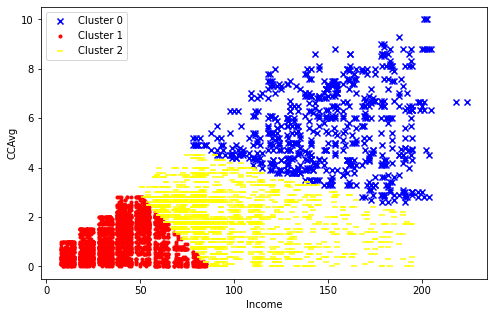

In [ ]:
markers = ['x', '.', '_']

plt.figure(figsize=[8,5])
for clust in range(3):
    temp = bank0[bank0.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg, \
                marker=markers[clust], \
                color=color[clust],\
                label="Cluster "+str(clust) )

plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

In [ ]:
bank0.groupby('Cluster')[['Income', 'CCAvg']].mean()

,Income,CCAvg
Cluster,,
0,150.390282,5.540345
1,39.135072,0.982417
2,96.142777,2.025165


Visualizando os clusters re-escalados

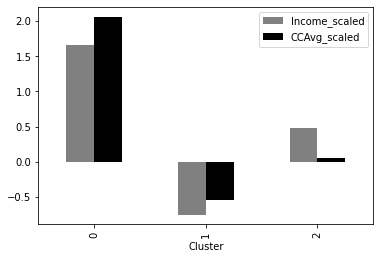

In [ ]:
bank0.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']].mean().plot.bar(color=['gray','black'])
plt.show()

In [ ]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', \
            'CreditCard', 'Online', 'Personal Loan']
bank0.groupby('Cluster')[sel_cols].mean()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.390282,5.540345,43.924765,89.537618,2.017241,0.285266,0.605016,0.413793
1,39.135072,0.982417,45.797197,42.231218,2.513429,0.294667,0.592448,0.000000
2,96.142777,2.025165,45.184049,65.185165,2.363636,0.296152,0.600112,0.120468


### Usando PCA para visualizar Clusters

In [ ]:
cluster_cols = ['Age', 'Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


In [ ]:
# Criando o objeto que representa o modelo do KMeans
model = KMeans(n_clusters=4, random_state=42)
# Fazendo o fit do modelo aos dados
model.fit(data_scaled[cluster_cols])

KMeans(n_clusters=4, random_state=42)

In [ ]:
# Guardando os clusters no dataframe data_scaled
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

In [ ]:
data_scaled

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,2
1,2,Male,-1.281035,-1.738999,1.195704,2
2,3,Female,-1.352802,-1.700830,-1.715913,2
3,4,Female,-1.137502,-1.700830,1.040418,2
4,5,Female,-0.563369,-1.662660,-0.395980,2
...,...,...,...,...,...,...
195,196,Female,-0.276302,2.268791,1.118061,1
196,197,Female,0.441365,2.497807,-0.861839,0
197,198,Male,-0.491602,2.497807,0.923953,1
198,199,Male,-0.491602,2.917671,-1.250054,0


In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
# Reduzindo as dimensões de 3 para duas com o PCA
pca_res = pca.fit_transform(data_scaled[cluster_cols])

# Criando duas novas colunas no dataframe re-escalado
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

In [ ]:
type(pca_res)


numpy.ndarray

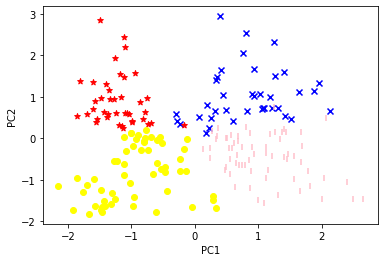

In [ ]:
markers = ['x', '*', 'o','|']

for clust in range(4):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color=color[clust])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Estudar os clusters

In [ ]:
data0['Cluster'] = data_scaled.Cluster

In [ ]:
data0.groupby('Cluster')[['Age', 'Income', 'Spend_score']].max()

,Age,Income,Spend_score
Cluster,,,
0,59,137,42
1,40,137,97
2,38,67,99
3,70,79,60


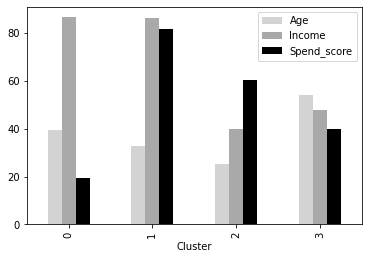

In [ ]:
data0.groupby('Cluster')[['Age', 'Income', \
                          'Spend_score']].mean() \
     .plot.bar(color=['lightgray', 'darkgray', 'black'])
plt.show()

*   **Grupo 0**: Mão de vaca de meia-idade (alta renda, baixo gasto) 
*   **Grupo 1**: Jovens apostadores (idade mais jovem, alta renda, alto gasto) 
*   **Grupo 2**: Jovens descontrolados (baixa renda, alto gasto) 
*   **Grupo 3**: Idosos comuns/medianos (renda média, gasto médio)

## O método Elbow (cotovele) - Sum of Squared Errors (SSE)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
mall_scaled = data0.copy()
cols_to_scale = ['Age', 'Income', 'Spend_score']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

mall_scaled[cols_to_scale] = scaler.fit_transform\
                             (mall_scaled[cols_to_scale])

In [ ]:
K = 3
cluster_cols = ['Income', 'Spend_score']

In [ ]:
model = KMeans(n_clusters=K, random_state=42)
model.fit(mall_scaled[cluster_cols])

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(model.inertia_)

157.7040081503594


In [ ]:
X = mall_scaled[cluster_cols]

In [ ]:
inertia_scores = []
for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(X).inertia_
    inertia_scores.append(inertia)

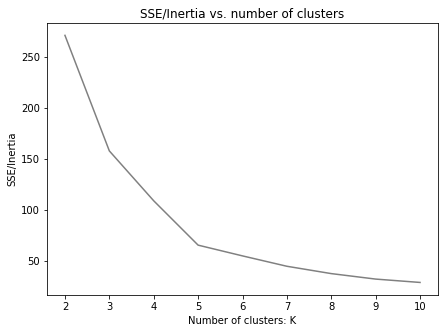

In [ ]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.title("SSE/Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

K=5 parece ser o cotovelo desta curva.

## Exercício - Otimizando a campanha de marketing de uma marca de roupas de luxo usando clustering (dataset com mais de 2 dimensões)
### Investigue o valor apropriado para K. 
### Realize uma inspeção visual plotando um gráfico de dispersão para vários valores de K e depois plote o gráfico de inércia. A aplicação dos dois métodos leva à mesma recomendação de K? Se não, qual dos dois métodos você escolheria? Por que?

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

data0 = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter04/Datasets/Clothing_Customers.csv')
data0.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [ ]:
cluster_cols = data0.columns
data_scaled = data0.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled[cluster_cols] = scaler.fit_transform(data0[cluster_cols])

In [ ]:
data_scaled

,income,age,days_since_purchase,annual_spend
0,-0.890426,0.604861,0.753257,0.062276
1,-0.553094,0.789354,1.306361,-0.058939
2,-0.039778,-0.040865,-0.834688,0.898182
3,-0.516023,0.973847,-1.432398,0.671353
4,1.005897,-1.332317,-1.253977,-1.553129
...,...,...,...,...
995,-0.864624,1.250586,-1.245056,0.512333
996,-1.739986,-0.963331,0.093100,-0.600808
997,0.246861,-0.040865,0.467784,1.211421
998,0.035123,1.250586,0.672967,0.897582


In [ ]:
cluster_cols

Index(['income', 'age', 'days_since_purchase', 'annual_spend'], dtype='object')

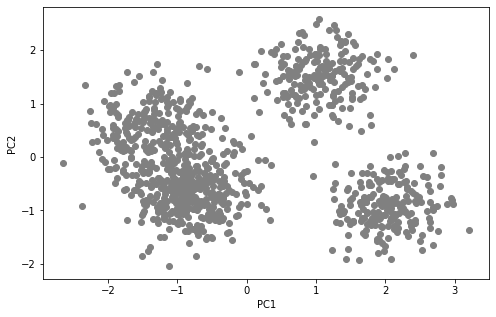

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2, random_state=42)
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

plt.figure(figsize=[8,5])
plt.scatter(data_scaled.pc1, data_scaled.pc2, color='gray')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

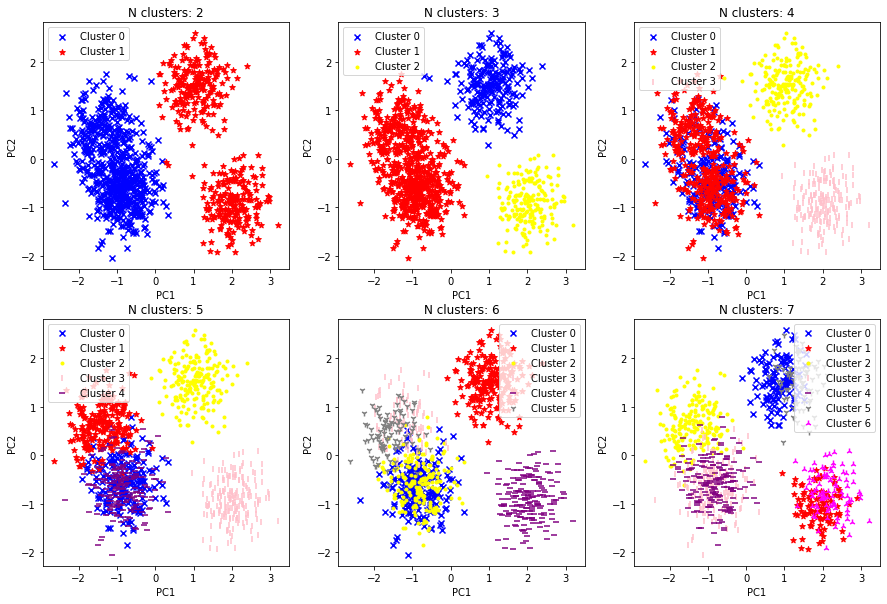

In [ ]:
from sklearn.cluster import KMeans

markers = ['x', '*', '.', '|', '_', '1', '2']
color = ['blue', 'red', 'yellow', 'pink', 'purple', 'gray', 'magenta']

plt.figure(figsize=[15,10])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    data_scaled['Cluster']= model.fit_predict(data_scaled[cluster_cols])

    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = data_scaled[data_scaled.Cluster == clust]
        plt.scatter(temp.pc1, temp.pc2, \
                    marker=markers[clust], \
                    label="Cluster "+str(clust), \
                    color=color[clust])
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.legend()
        plt.title("N clusters: "+str(n))

plt.show()

In [ ]:
inertia_scores = []

for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(data_scaled).inertia_
    inertia_scores.append(inertia)

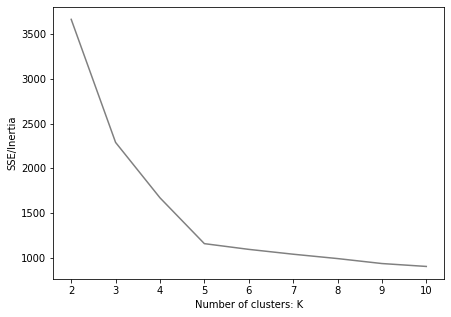

In [ ]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()